<a href="https://colab.research.google.com/github/Dheeraj183/UMBC-DATA609-FALL24-WANG/blob/main/Mini_Project/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10 - Mini Project

Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

## Step 1 - Import Python libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


## Step 2 - Load the input dataset

Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [44]:
# Load the dataset
url = "https://raw.githubusercontent.com/Dheeraj183/UMBC-DATA609-FALL24-WANG/refs/heads/main/Mini_Project/2024-11-20T17-16_export.csv"
df = pd.read_csv(url)

# Display the first few rows
print("Dataset loaded successfully. Preview:")
print(df.head())

Dataset loaded successfully. Preview:
   Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  GDP ($

## Step 3 - Explore the input dataset

- Display number of rows and columns
- Dispaly at first 5 rows, last 5 rows, and random 5 rows.
- Display information about the dataset
- For all numerical variables, display their summary statistics
- For all categorical variables, display their number of categories and most frequent category
- Find out how many countries each region has.
- Display all countries that are Latin American & Caribbean.
- Find out how many countries each income level has.
- Display all countries that are of high income.


In [45]:
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset Shape: 5208 rows and 17 columns.


In [46]:
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\nRandom 5 rows of the dataset:")
print(df.sample(5))



First 5 rows of the dataset:
   Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  GDP ($Billions

In [47]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                5208 non-null   int64  
 1   Year                                      5208 non-null   int64  
 2   Country Code                              5208 non-null   object 
 3   Country Name                              5208 non-null   object 
 4   Region                                    5208 non-null   object 
 5   Income Group                              5208 non-null   object 
 6   Lending Type                              5208 non-null   object 
 7   Military Expenditure ($Millions)          3553 non-null   float64
 8   Military Expenditure (% of GDP)           3428 non-null   float64
 9   GDP ($Billions)                           4988 non-null   float64
 10  GDP PPP ($Bill

In [48]:
print("\nSummary statistics for numerical variables:")
print(df.describe())



Summary statistics for numerical variables:
        Unnamed: 0         Year  Military Expenditure ($Millions)  \
count  5208.000000  5208.000000                       3553.000000   
mean   2603.500000  2011.500000                       9692.743472   
std    1503.564432     6.922851                      53776.761846   
min       0.000000  2000.000000                          0.000000   
25%    1301.750000  2005.750000                        107.553688   
50%    2603.500000  2011.500000                        569.671622   
75%    3905.250000  2017.250000                       3625.564802   
max    5207.000000  2023.000000                     876943.200000   

       Military Expenditure (% of GDP)  GDP ($Billions)  GDP PPP ($Billions)  \
count                      3428.000000      4988.000000          4726.000000   
mean                          1.966078       325.507413           509.041065   
std                           1.772127      1491.780379          1940.946622   
min          

In [49]:
# Analysis of categorical variables
print("\nCategorical Variable Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(f" - Number of Categories: {df[col].nunique()}")
    print(f" - Most Frequent Category: {df[col].mode()[0]}")
    print()


Categorical Variable Analysis:
Column: Country Code
 - Number of Categories: 217
 - Most Frequent Category: ABW

Column: Country Name
 - Number of Categories: 217
 - Most Frequent Category: Afghanistan

Column: Region
 - Number of Categories: 7
 - Most Frequent Category: Europe & Central Asia

Column: Income Group
 - Number of Categories: 5
 - Most Frequent Category: High income

Column: Lending Type
 - Number of Categories: 4
 - Most Frequent Category: Not classified

Column: Group
 - Number of Categories: 3
 - Most Frequent Category: REST OF WORLD



In [50]:
# Number of countries in each region
print("\nNumber of countries in each region:")
print(df.groupby('Region')['Country Name'].nunique())

# Display all countries in Latin America & Caribbean
print("\nCountries in Latin America & Caribbean:")
print(df[df['Region'] == 'Latin America & Caribbean']['Country Name'].unique())

# Number of countries in each income level
print("\nNumber of countries in each income level:")
print(df.groupby('Income Group')['Country Name'].nunique())

# Display all high-income countries
print("\nCountries in High Income Group:")
print(df[df['Income Group'] == 'High income']['Country Name'].unique())



Number of countries in each region:
Region
East Asia & Pacific           37
Europe & Central Asia         58
Latin America & Caribbean     42
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
Name: Country Name, dtype: int64

Countries in Latin America & Caribbean:
[]

Number of countries in each income level:
Income Group
High income            85
Low income             26
Lower middle income    51
Not classified          1
Upper middle income    54
Name: Country Name, dtype: int64

Countries in High Income Group:
['Aruba' 'Andorra' 'United Arab Emirates' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Belgium' 'Bulgaria'
 'Bahrain' 'Bahamas, The' 'Bermuda' 'Barbados' 'Brunei Darussalam'
 'Canada' 'Switzerland' 'Channel Islands' 'Chile' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'Faroe Islands' 'United Kingdom' 'Gibraltar' 'Gre

## Step 4 - Categorize Each Country

Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD".

In [51]:
def categorize_group(country):
    g7 = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']
    brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
    if country in g7:
        return 'G7'
    elif country in brics:
        return 'BRICS'
    else:
        return 'REST of WORLD'

df['Group'] = df['Country Name'].apply(categorize_group)
print("\nGrouping results:")
print(df[['Country Name', 'Group']].head())


Grouping results:
  Country Name          Group
0        Aruba  REST of WORLD
1  Afghanistan  REST of WORLD
2       Angola  REST of WORLD
3      Albania  REST of WORLD
4      Andorra  REST of WORLD


## Step 5 - Aggregate Data

Aggregate the following columns at the "Group" level for each year:

- For GDP, using "sum" for aggregation.
- For GDP Per Capita, use "mean" for aggregation.
- Check your calculation with the reference site.

In [52]:
grouped = df.groupby(['Group', 'Year']).agg(
    Total_GDP=('GDP ($Billions)', 'sum'),
    Avg_GDP_Per_Capita=('GDP Per Capita ($)', 'mean')
).reset_index()
print("\nAggregated data:")
print(grouped.head())



Aggregated data:
   Group  Year    Total_GDP  Avg_GDP_Per_Capita
0  BRICS  2000  2746.638305         2028.292589
1  BRICS  2001  2826.856648         1922.616561
2  BRICS  2002  2969.850120         1905.605611
3  BRICS  2003  3453.581362         2391.987818
4  BRICS  2004  4180.612522         3025.328901


## Step 6 - Calculate Percentage Share of GDP

For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [53]:
grouped['GDP_Share_Percentage'] = grouped['Total_GDP'] / grouped.groupby('Year')['Total_GDP'].transform('sum') * 100
print("\nGDP Share Percentage:")
print(grouped.head())



GDP Share Percentage:
   Group  Year    Total_GDP  Avg_GDP_Per_Capita  GDP_Share_Percentage
0  BRICS  2000  2746.638305         2028.292589              8.204132
1  BRICS  2001  2826.856648         1922.616561              8.489507
2  BRICS  2002  2969.850120         1905.605611              8.586325
3  BRICS  2003  3453.581362         2391.987818              8.898699
4  BRICS  2004  4180.612522         3025.328901              9.557570


## Step 7 - Plot the GDP Percentage Share Over Time

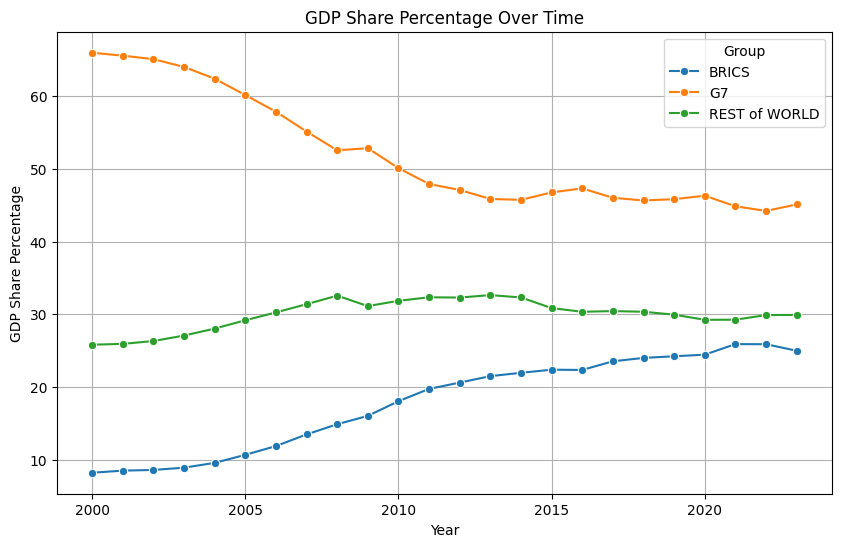

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Year', y='GDP_Share_Percentage', hue='Group', marker='o')
plt.title("GDP Share Percentage Over Time")
plt.xlabel('Year')
plt.ylabel('GDP Share Percentage')
plt.legend(title='Group')
plt.grid(True)
plt.show()

## Step 8 - Plot the Total GDP Over Time

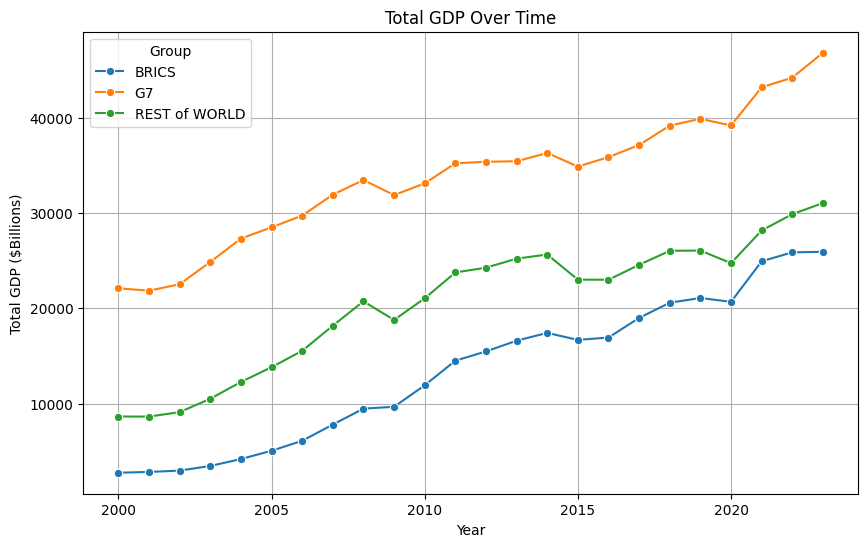

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Year', y='Total_GDP', hue='Group', marker='o')
plt.title("Total GDP Over Time")
plt.xlabel('Year')
plt.ylabel('Total GDP ($Billions)')
plt.legend(title='Group')
plt.grid(True)
plt.show()

## Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

- Group Name
- GDP Percentage Share
- GDP Total

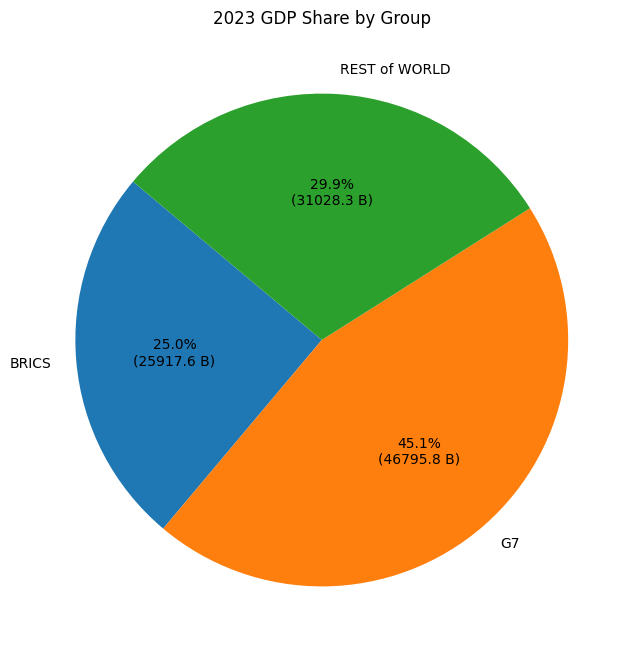

In [56]:
gdp_2023 = grouped[grouped['Year'] == 2023]
plt.figure(figsize=(8, 8))
plt.pie(gdp_2023['Total_GDP'], labels=gdp_2023['Group'], autopct=lambda p: f'{p:.1f}%\n({p * gdp_2023["Total_GDP"].sum() / 100:.1f} B)', startangle=140)
plt.title("2023 GDP Share by Group")
plt.show()

## Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

- Country Name
- GDP Percentage Share
- GDP Total

<ipython-input-57-8b939a0e0692>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



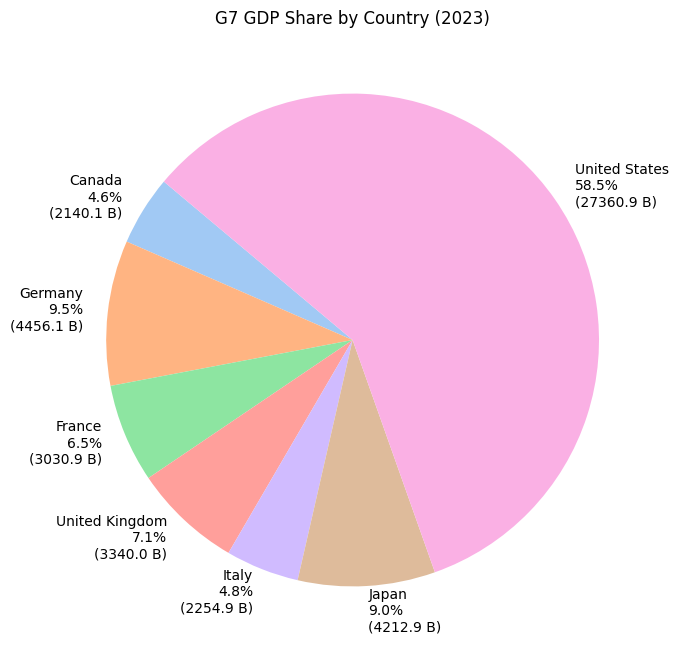

<ipython-input-57-8b939a0e0692>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



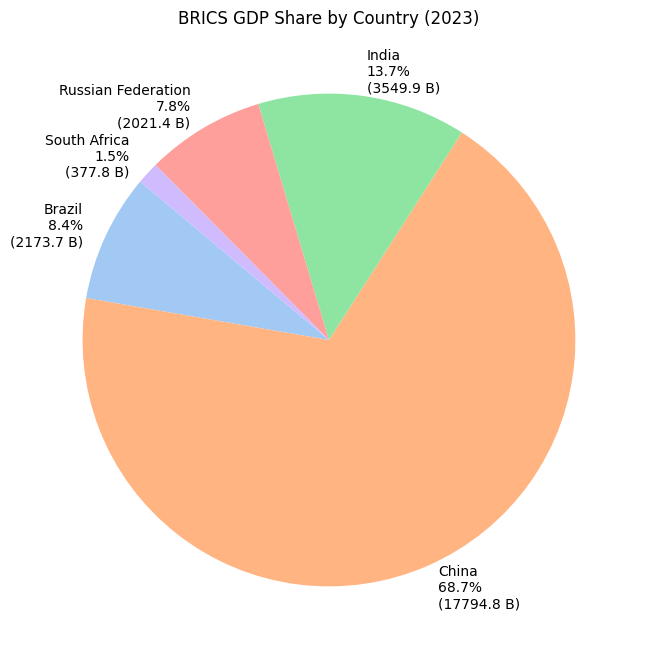

In [57]:
# Data for G7 and BRICS in 2023
gdp_2023_groups = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]

# Function to create detailed pie chart
def plot_gdp_pie_chart(data, group_name):
    group_data = data[data['Group'] == group_name]
    total_gdp = group_data['GDP ($Billions)'].sum()

    # Calculate percentage share and create labels
    group_data['GDP_Share_Percentage'] = (group_data['GDP ($Billions)'] / total_gdp) * 100
    labels = group_data.apply(
        lambda row: f"{row['Country Name']}\n{row['GDP_Share_Percentage']:.1f}%\n({row['GDP ($Billions)']:.1f} B)", axis=1
    )

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        group_data['GDP ($Billions)'], labels=labels, autopct=None, startangle=140, colors=sns.color_palette('pastel')
    )
    plt.title(f"{group_name} GDP Share by Country (2023)")
    plt.show()

# Generate pie charts for G7 and BRICS
plot_gdp_pie_chart(gdp_2023_groups, "G7")
plot_gdp_pie_chart(gdp_2023_groups, "BRICS")


## Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [58]:
fig = px.sunburst(df[df['Year'] == 2023], path=['Group', 'Country Name'], values='GDP ($Billions)', title="2023 GDP Sunburst Chart")
fig.show()

## Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [59]:
fig = px.treemap(df[df['Year'] == 2023], path=['Group', 'Country Name'], values='GDP ($Billions)', title="2023 GDP Tree Map")
fig.show()


## Step 13 - Plot the Historic Trend of GDP Per Capita

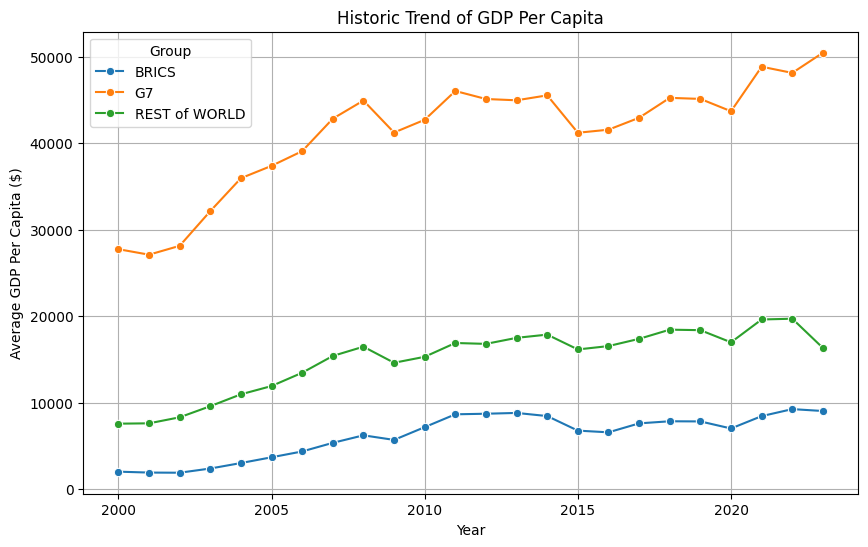

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Year', y='Avg_GDP_Per_Capita', hue='Group', marker='o')
plt.title("Historic Trend of GDP Per Capita")
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita ($)')
plt.legend(title='Group')
plt.grid(True)
plt.show()

## Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.

<ipython-input-61-d44fe7c91fdc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




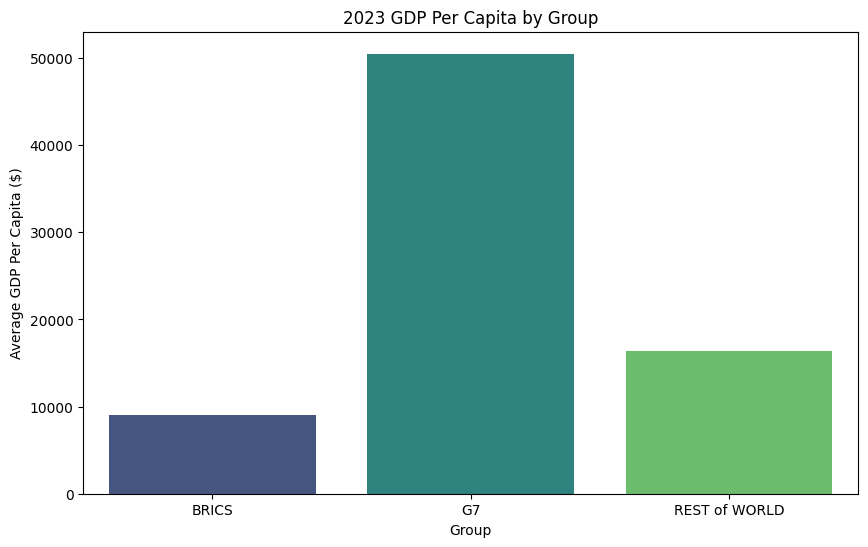

In [61]:
gdp_per_capita_2023 = grouped[grouped['Year'] == 2023]
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_per_capita_2023, x='Group', y='Avg_GDP_Per_Capita', palette='viridis')
plt.title("2023 GDP Per Capita by Group")
plt.xlabel('Group')
plt.ylabel('Average GDP Per Capita ($)')
plt.show()


## Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

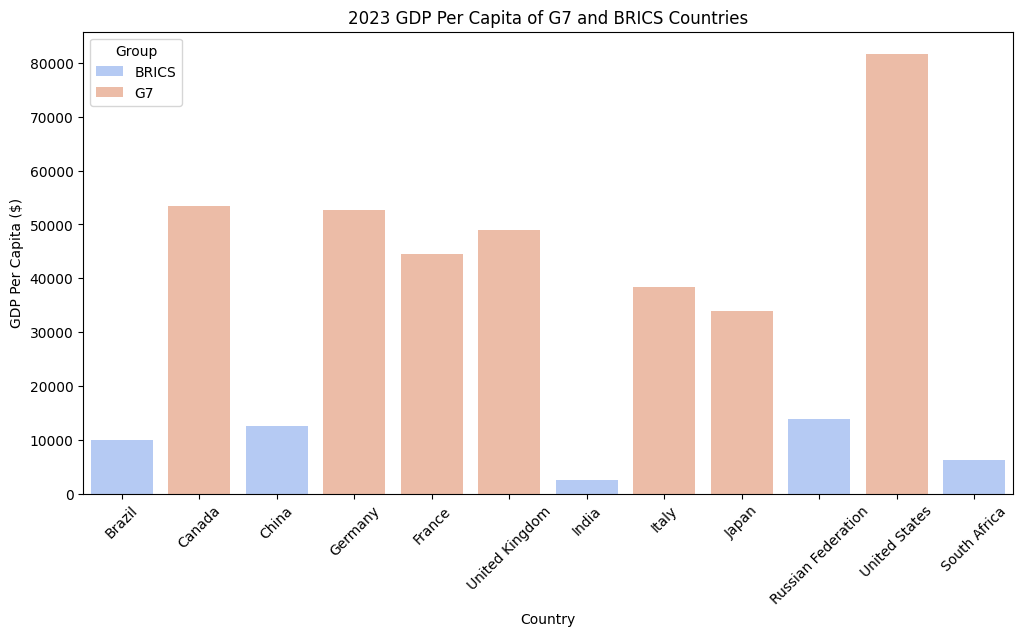

In [62]:
countries_2023 = df[(df['Year'] == 2023) & (df['Group'].isin(['G7', 'BRICS']))]
plt.figure(figsize=(12, 6))
sns.barplot(data=countries_2023, x='Country Name', y='GDP Per Capita ($)', hue='Group', palette='coolwarm')
plt.title("2023 GDP Per Capita of G7 and BRICS Countries")
plt.xlabel('Country')
plt.ylabel('GDP Per Capita ($)')
plt.xticks(rotation=45)
plt.show()

## Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [63]:
fig = px.choropleth(df[df['Group'].isin(['G7', 'BRICS'])], locations="Country Name", color="Group",
                    locationmode="country names", title="G7 and BRICS Countries Choropleth",
                    color_discrete_map={"G7": "blue", "BRICS": "red"})
fig.show()